In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


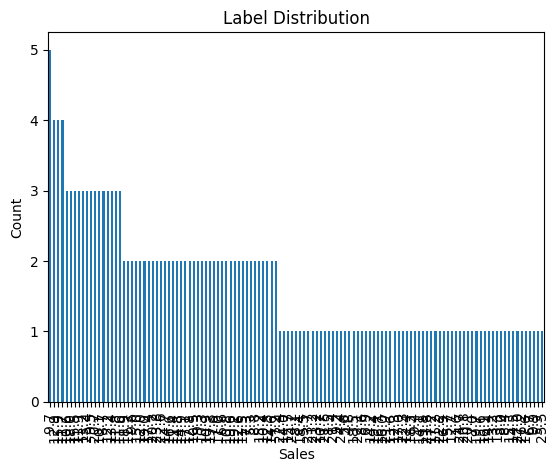

In [ ]:
df = pd.read_csv("Advertising.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

df['Sales'].value_counts().plot(kind='bar', title='Label Distribution')
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()


In [ ]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate records:", df.duplicated().sum())
print("Data types:\n", df.dtypes)
df.drop_duplicates(inplace=True)


Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Duplicate records: 0
Data types:
 TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


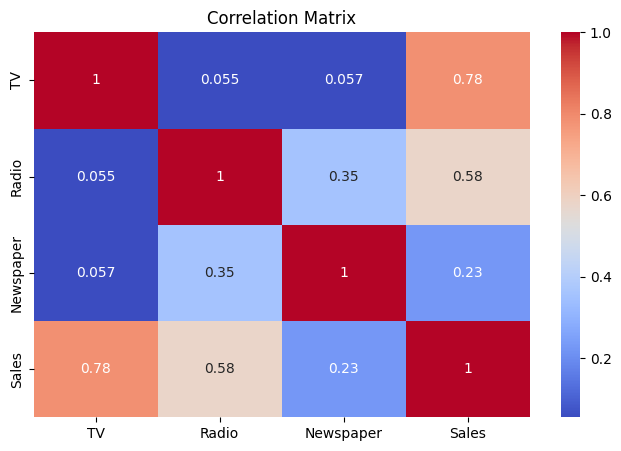

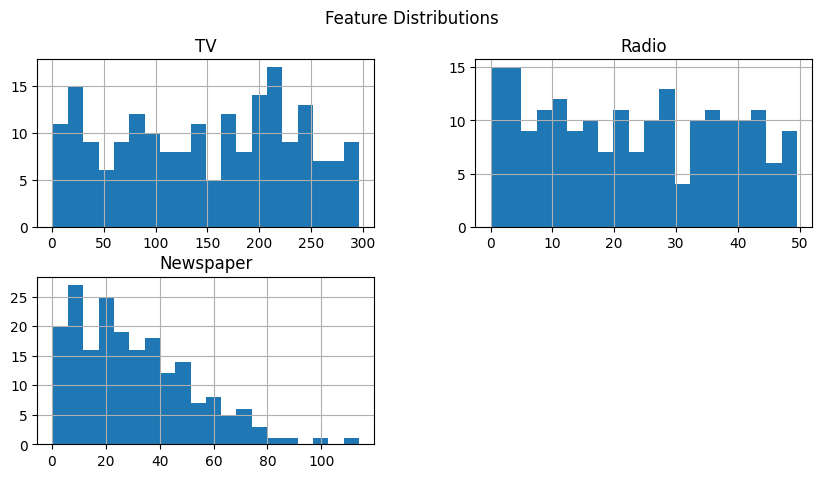

In [ ]:
# visualize correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# distribution of features
df[['TV', 'Radio', 'Newspaper']].hist(bins=20, figsize=(10, 5))
plt.suptitle("Feature Distributions")
plt.show()

# feature scaling
scaler = StandardScaler()
X = df[['TV', 'Radio', 'Newspaper']]
X_scaled = scaler.fit_transform(X)

y = df['Sales']


In [ ]:
y = df['Sales']

from sklearn.preprocessing import LabelEncoder

if y.dtype == 'object' or not np.issubdtype(y.dtype, np.integer):
    le = LabelEncoder()
    y = le.fit_transform(y)


In [ ]:
# feature scaling
scaler = StandardScaler()
X = df[['TV', 'Radio', 'Newspaper']]
X_scaled = scaler.fit_transform(X)

y = df['Sales']
from sklearn.preprocessing import LabelEncoder
if y.dtype == 'object' or not np.issubdtype(y.dtype, np.integer):
    le = LabelEncoder()
    y = le.fit_transform(y)

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0
)

# train naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.75
Testing Accuracy: 0.0

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       2.0
          21       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_